In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('Churn_Modelling.csv')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
# Checking for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


### Encoding Categorical Variables

In [24]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
print(df.dtypes)

RowNumber              int64
CustomerId             int64
Surname               object
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object


### Feature Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,2,15647311,Hill,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,3,15619304,Onio,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,4,15701354,Boni,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,5,15737888,Mitchell,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


### Summary Statistics

In [29]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean    5000.50000  1.569094e+07 -4.824585e-16  2.318146e-16 -1.078249e-16   
std     2886.89568  7.193619e+04  1.000050e+00  1.000050e+00  1.000050e+00   
min        1.00000  1.556570e+07 -3.109504e+00 -1.994969e+00 -1.733315e+00   
25%     2500.75000  1.562853e+07 -6.883586e-01 -6.600185e-01 -6.959818e-01   
50%     5000.50000  1.569074e+07  1.522218e-02 -1.832505e-01 -4.425957e-03   
75%     7500.25000  1.575323e+07  6.981094e-01  4.842246e-01  6.871299e-01   
max    10000.00000  1.581569e+07  2.063884e+00  5.061197e+00  1.724464e+00   

            Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count  1.000000e+04   1.000000e+04  10000.00000    10000.000000   
mean  -6.252776e-17   1.634248e-17      0.70550        0.515100   
std    1.000050e+00   1.000050e+00      0.45584        0.499797   
min   -1.225848e+00  -9.11583

### Data Distributions

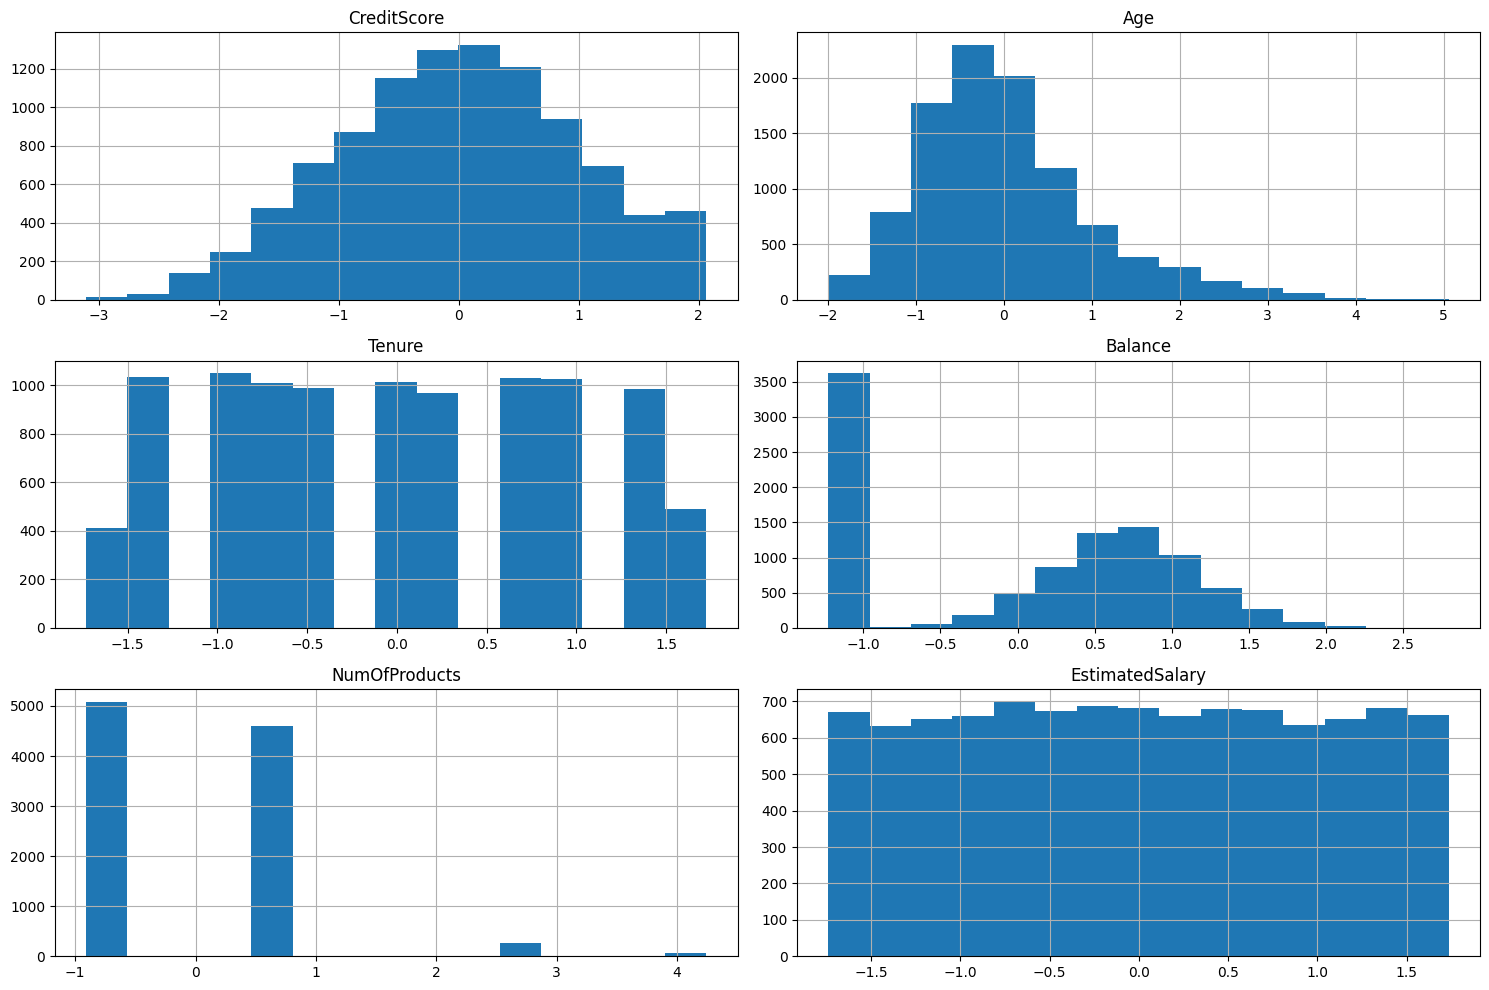

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()


### Correlation Analysis

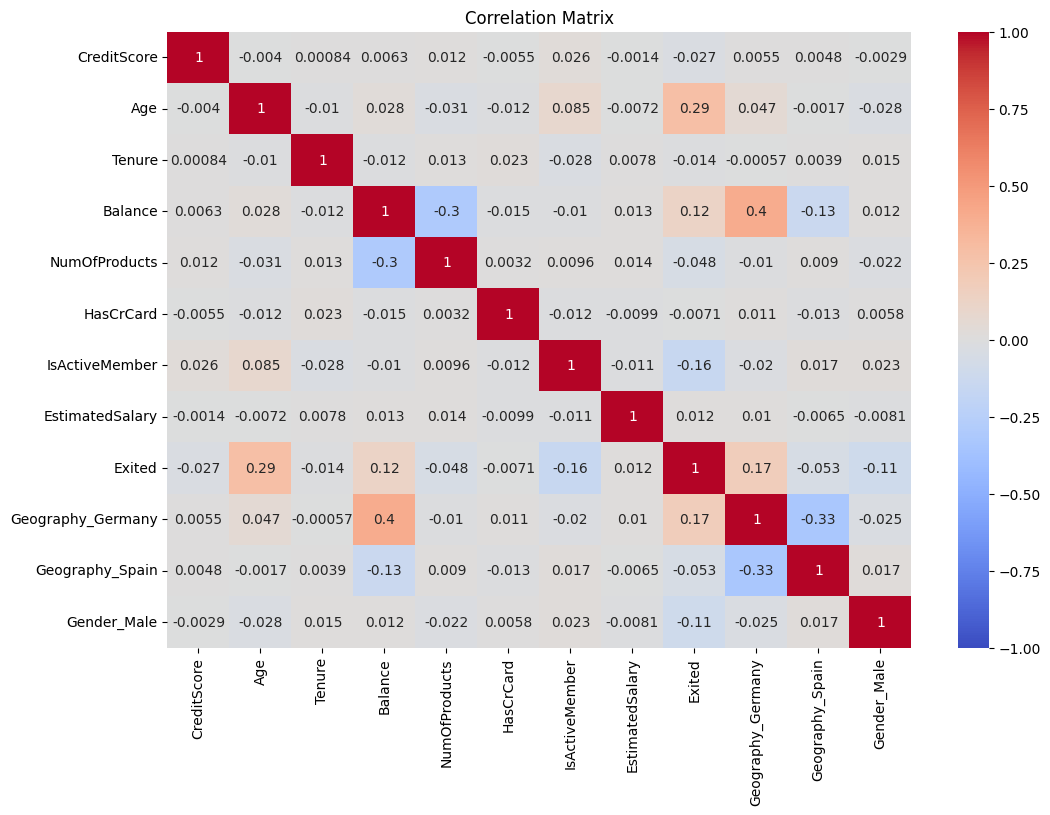

In [38]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

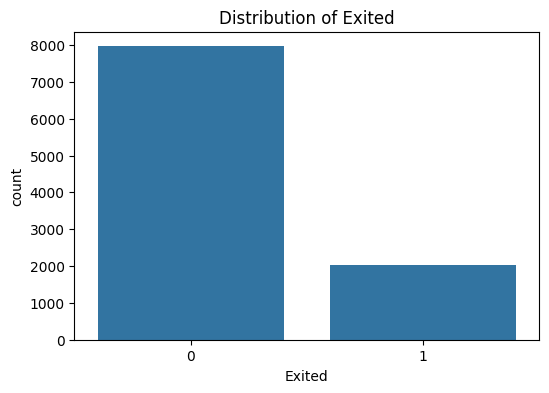

Churn percentage:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [35]:
# Countplot of the target variable 'Exited'
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited')
plt.show()

# Calculate percentage of churned customers
churn_percentage = df['Exited'].value_counts(normalize=True) * 100
print(f"Churn percentage:\n{churn_percentage}")


### Countplot of 'Geography' and 'Gender' by churn


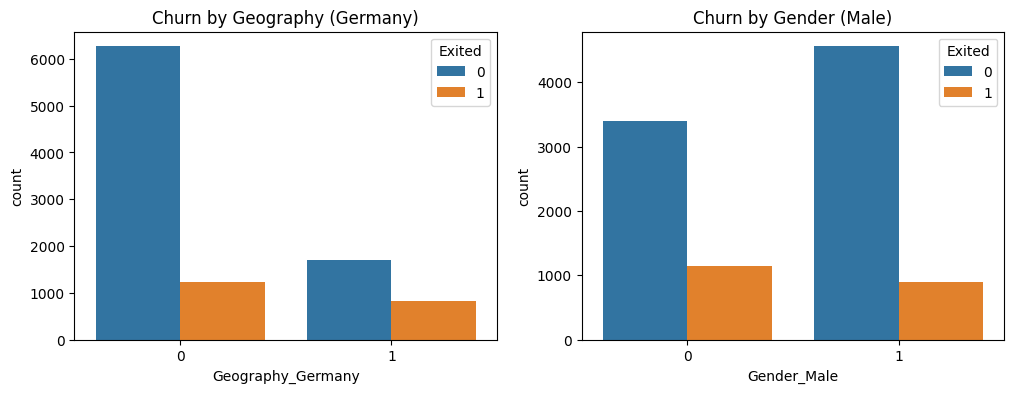

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Geography_Germany', hue='Exited', data=df)
plt.title('Churn by Geography (Germany)')
plt.subplot(1, 2, 2)
sns.countplot(x='Gender_Male', hue='Exited', data=df)
plt.title('Churn by Gender (Male)')
plt.show()


### Dropping Unnecessary Columns

In [47]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Splitting the data

In [48]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train, X_test

(      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
 9254     0.367013 -0.660018  0.341352 -1.225848       0.807737          1   
 1561    -0.191713  0.293517 -0.350204  0.691389       0.807737          1   
 1670    -0.947028 -1.422847 -0.695982  0.613102      -0.911583          1   
 6087    -0.926334 -1.136786  1.378686  0.948021      -0.911583          1   
 6669    -1.381593  1.628468  1.378686  1.052363      -0.911583          0   
 ...           ...       ...       ...       ...            ...        ...   
 5734     1.215448  1.437761  1.032908 -0.108554      -0.911583          1   
 5191     0.325625  1.819175 -1.387538 -1.225848      -0.911583          1   
 5390     0.874005 -0.087897 -1.387538 -1.225848       2.527057          0   
 860      0.170424  0.388871  1.032908  1.822949      -0.911583          1   
 7270     0.480827  1.151700 -1.387538  1.144727      -0.911583          1   
 
       IsActiveMember  EstimatedSalary  Geography_Germany  Geo

### Standardizing Numerical Features

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initializing and Training Models

In [58]:
logistic_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [59]:
logistic_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predictions
y_pred_log_reg = logistic_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

In [61]:
# Performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}\n")

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.811

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8665



### Creating the Confusion Matrix

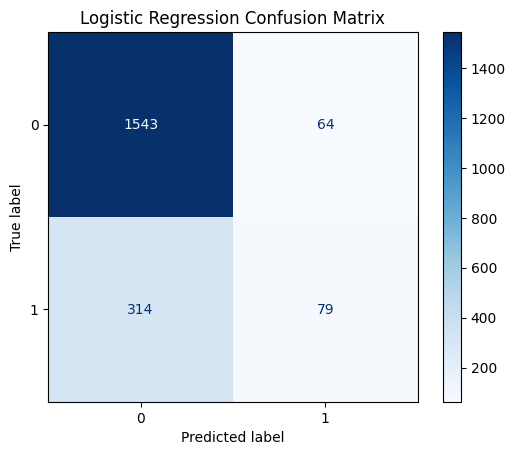

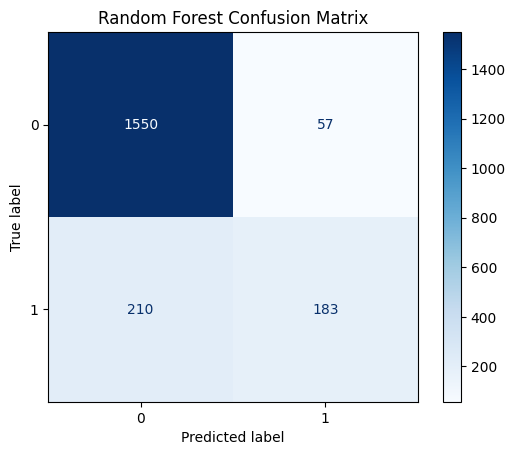

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=[0, 1])
disp_log_reg.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=[0, 1])
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


### ROC Curve and AUC

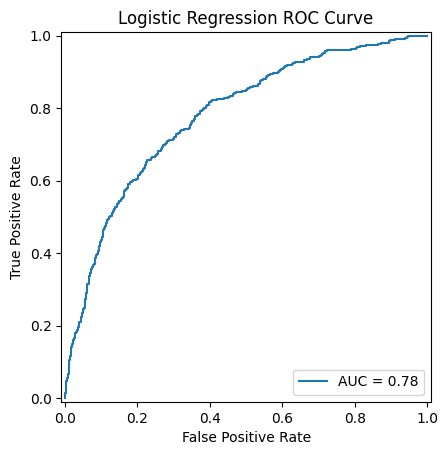

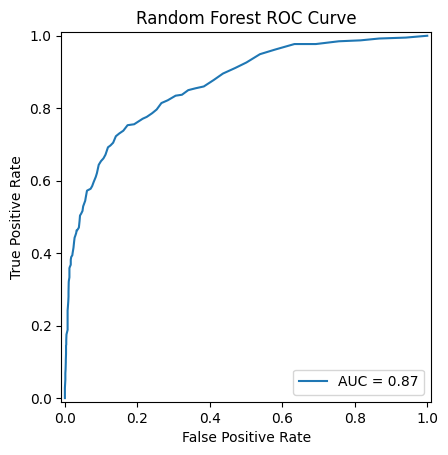

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Logistic Regression ROC Curve
y_prob_log_reg = logistic_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
RocCurveDisplay(fpr=fpr_log_reg, tpr=tpr_log_reg, roc_auc=roc_auc_log_reg).plot()
plt.title('Logistic Regression ROC Curve')
plt.show()

# Random Forest ROC Curve
y_prob_rf = random_forest.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf).plot()
plt.title('Random Forest ROC Curve')
plt.show()

#### Conclusion: 
Based on the evaluation of both Logistic Regression and Random Forest models for predicting employee churn, the Random Forest model demonstrated superior performance. It achieved higher accuracy, better precision and recall for churned employees, and a higher ROC AUC score, indicating its better discriminatory power. The Logistic Regression model, while effective at predicting non-churned employees, struggled to identify churned employees accurately. Therefore, the Random Forest model is preferred for predicting employee churn due to its balanced performance and reliability. For further improvement, hyperparameter tuning, feature engineering, and considering ensemble methods are recommended. Insights from the model can guide HR strategies to proactively address factors contributing to employee churn.